In [1]:
%gui qt


.. _tut_inverse_basics:

Basics of source localization
=============================

Authors: Alexandre Gramfort <alexandre.gramfort@telecom-paristech.fr>
         Denis Engemann <denis.engemann@gmail.com>

    

In [2]:
import numpy as np
import mne
from mne.datasets import sample
from mne.minimum_norm import (make_inverse_operator, apply_inverse,
                              write_inverse_operator)

mne.set_log_level('WARNING')

Process MEG data


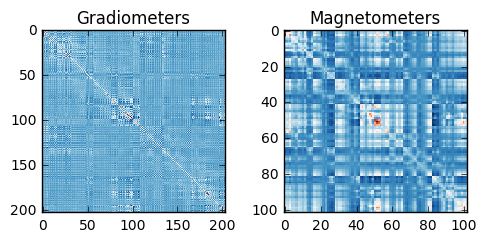

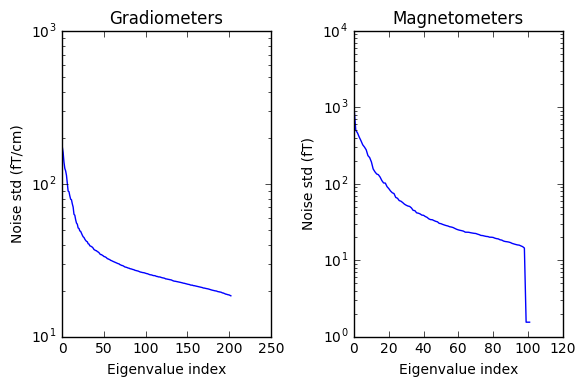

In [3]:
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'

raw = mne.io.read_raw_fif(raw_fname)
events = mne.find_events(raw, stim_channel='STI 014')

event_id = dict(aud_r=1)  # event trigger and conditions
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.5  # end of each epoch (500ms after the trigger)
raw.info['bads'] = ['MEG 2443', 'EEG 053']
picks = mne.pick_types(raw.info, meg=True, eeg=False, eog=True,
                       exclude='bads')
baseline = (None, 0)  # means from the first instant to t = 0
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=picks, baseline=baseline, reject=reject)

# compute regularized noise covariance

noise_cov = mne.compute_covariance(
    epochs, tmax=0., method=['shrunk', 'empirical'])

fig_cov, fig_spectra = mne.viz.plot_cov(noise_cov, raw.info)

Compute the evoked response


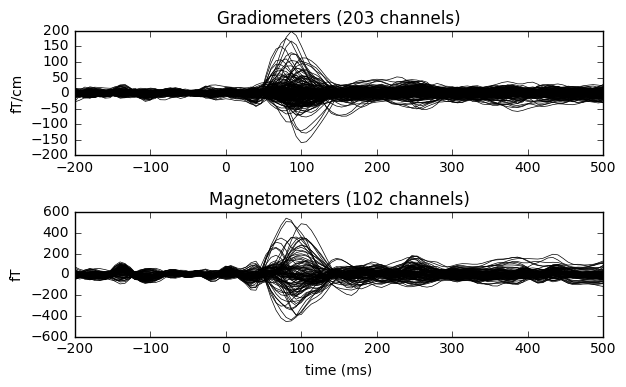

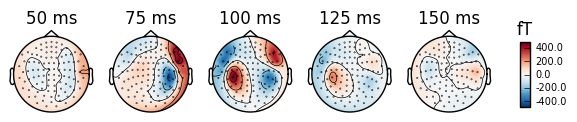

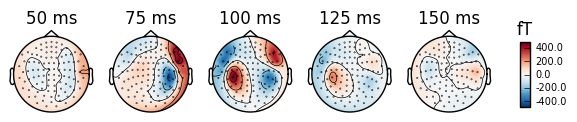

In [4]:
evoked = epochs.average()
evoked.plot()
evoked.plot_topomap(times=np.linspace(0.05, 0.15, 5), ch_type='mag')

Inverse modeling: MNE and dSPM on evoked and raw data


In [ ]:
import matplotlib.pyplot as plt
# Read the forward solution and compute the inverse operator
fname_fwd = data_path + '/MEG/sample/sample_audvis-meg-oct-6-fwd.fif'
fwd = mne.read_forward_solution(fname_fwd, surf_ori=True)

# Restrict forward solution as necessary for MEG
fwd = mne.pick_types_forward(fwd, meg=True, eeg=False)

# make an M/EEG, MEG-only, and EEG-only inverse operators
info = evoked.info
inverse_operator = make_inverse_operator(info, fwd, noise_cov,
                                         loose=0.2, depth=0.8)

write_inverse_operator('sample_audvis-meg-oct-6-inv.fif',
                       inverse_operator)

# Compute inverse solution

method = "dSPM"
snr = 3.
lambda2 = 1. / snr ** 2
stc = apply_inverse(evoked, inverse_operator, lambda2,
                    method=method, pick_ori=None)


# visualize

subjects_dir = data_path + '/subjects'
stc.plot(surface='inflated', hemi='rh', subjects_dir=subjects_dir)
brain.set_data_time_index(45)
brain.scale_data_colormap(fmin=8, fmid=12, fmax=15, transparent=True)
brain.show_view('lateral')

# morph data to average brain
stc_fsaverage = stc.morph(subject_to='fsaverage', subjects_dir=subjects_dir)

brain_fsaverage = stc_fsaverage.plot(surface='inflated', hemi='rh',
                                     subjects_dir=subjects_dir)
brain_fsaverage.set_data_time_index(45)
brain_fsaverage.scale_data_colormap(fmin=8, fmid=12, fmax=15, transparent=True)
brain_fsaverage.show_view('lateral')

sux
Updating smoothing matrix, be patient..
Smoothing matrix creation, step 1
Smoothing matrix creation, step 2
Smoothing matrix creation, step 3
Smoothing matrix creation, step 4
Smoothing matrix creation, step 5
Smoothing matrix creation, step 6
Smoothing matrix creation, step 7
Smoothing matrix creation, step 8
Smoothing matrix creation, step 9
Smoothing matrix creation, step 10
colormap: fmin=3.98e+00 fmid=4.63e+00 fmax=1.83e+01 transparent=1
